In [1]:
import pandas as pd 


df = pd.read_csv("test_data.csv")

missing_percent = df.isnull().mean() * 100
print("Missing Values (%):")
print(missing_percent[missing_percent > 0].sort_values(ascending=False))


Missing Values (%):
supplier_past_due_pct       13.127241
network_avail               12.521100
mdi_stockouts               12.521100
oh_5d_change                11.942162
min_on_hand_change_5d        7.554790
ltm_90pct_difference_wks     5.067450
ltm_90pct                    5.067450
ltm_75pct                    5.067450
ltm_median                   5.067450
dmd_fcst_portion             4.236011
dmd_rolling_90d              4.236011
no_ship_ratio                3.514780
on_time_ratio                3.514780
early_ratio                  3.514780
ots_pct                      3.160443
dmd_wkly_dos                 2.280876
dmd_wkly_95pct               2.274598
ss_units_left_pct            0.332017
max_oh_left_pct              0.025111
orders_12m                   0.000698
part_cost                    0.000698
dtype: float64


In [4]:
duplicate_count = df.duplicated().sum()
if duplicate_count > 0:
    print(f" Found {duplicate_count} duplicate rows.")

In [5]:
print("\nSummary Statistics:")
print(df.describe(include='all'))


Summary Statistics:
           Unnamed: 0 suggestion_dt   expid    expid_desc   item_id     pdc  \
count   143366.000000        143366  143366        143366    143366  143366   
unique            NaN            68      36             1     26656      10   
top               NaN    2021-09-02  13RRES  Inside Leads  B72-8825     ROC   
freq              NaN          7568   15413        143366       192   27605   
mean     71682.500000           NaN     NaN           NaN       NaN     NaN   
std      41386.343684           NaN     NaN           NaN       NaN     NaN   
min          0.000000           NaN     NaN           NaN       NaN     NaN   
25%      35841.250000           NaN     NaN           NaN       NaN     NaN   
50%      71682.500000           NaN     NaN           NaN       NaN     NaN   
75%     107523.750000           NaN     NaN           NaN       NaN     NaN   
max     143365.000000           NaN     NaN           NaN       NaN     NaN   

       vndr_concat    desk vel

KPIs

RHIT rate 
percentage of unexpected regional hits
Fill rate 


Features - most likely to contribute 

days_on_hand

ss-units_left_pct

doh_less_ss 

days_below_ss

doh_to_ltm


ltm_median, ltm_75pct, ltm_90pct


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

try:
    df = pd.read_csv("Paccar Cleaned Data.csv")
    if 'Unnamed: 0' in df.columns:
        df = df.drop('Unnamed: 0', axis=1)
except FileNotFoundError:
    print("Error: 'Paccar Cleaned Data.csv' not found.")
    print("Using a dummy dataframe for demonstration purposes.")
    # Create a dummy dataframe for code execution to proceed if file not found
    df = pd.DataFrame({
        'rhit_label': np.random.randint(0, 2, 200),
        'ltm_median': np.random.rand(200) * 50 + 10, # Lead time
        'ots_pct': np.random.rand(200) * 0.5 + 0.5,    # Supplier on-time shipping (0.5 to 1.0)
        'days_on_hand': np.random.rand(200) * 100,   # Inventory state
        'doh_less_ss': np.random.randint(0, 2, 200), # DOH vs Safety Stock
        'dmd_wkly_dos': np.random.rand(200) * 30,    # Demand
        'ss_units_left_pct': np.random.rand(200) * 2 - 0.5, # Safety stock buffer
        'no_ship_ratio': np.random.rand(200) * 0.2,     # Supplier no ship (0 to 0.2)
        'ltm_90pct_difference_wks': np.random.rand(200) * 5, # Lead time variability
        'oo_dos': np.random.rand(200) * 40,
        'days_below_ss': np.random.randint(0, 30, 200),
        'ltm_90pct': np.random.rand(200)*60 + 15,
        'ltm_75pct': np.random.rand(200)*55 + 12,
        'mdi_stockouts': np.random.randint(0,5,200),
        'doh_to_ltm': np.random.rand(200)*3
    })

# You can then continue with your data analysis using 'df'
# For example, to check if the DataFrame was loaded or created:
# print(df.head())

Generating Correlation Heatmap...
Saved plot: correlation_heatmap.png


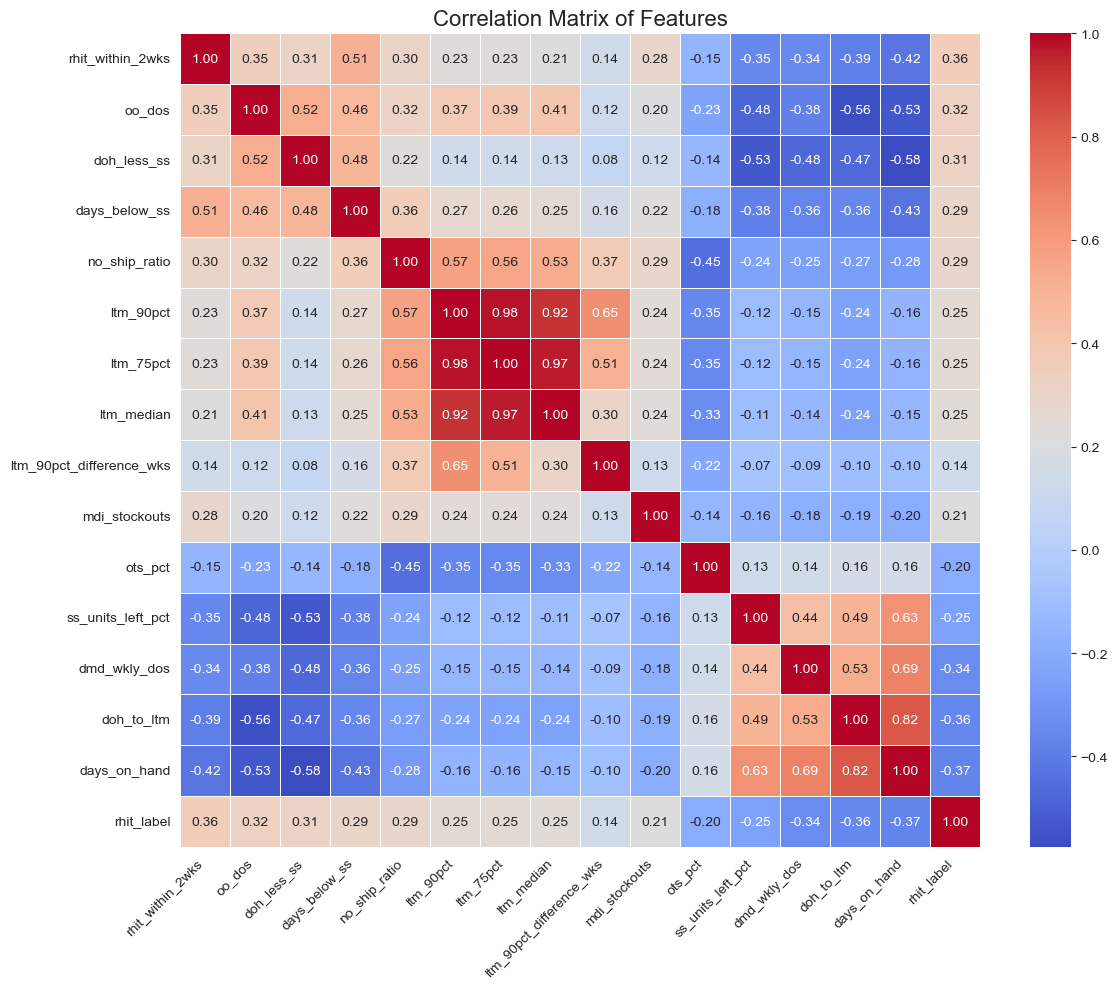


--- Interpretation of Correlation Heatmap (Example): ---
Look at the row/column for 'rhit_label'.
- Positive values indicate features that tend to be higher when a RHIT occurs.
  Example: If 'ltm_median' has a positive correlation, it suggests longer lead times are associated with more RHITs.
- Negative values indicate features that tend to be lower when a RHIT occurs.
  Example: If 'days_on_hand' has a negative correlation, it suggests lower stock levels are associated with more RHITs.
Stronger correlations (closer to 1 or -1) indicate stronger linear relationships.
Also look for correlations between predictor features (multicollinearity), which can be important for modeling but less so for EDA patterns.


In [13]:
sns.set_style("whitegrid")

# --- 1. Correlation Heatmap ---
print("Generating Correlation Heatmap...")
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
print("Saved plot: correlation_heatmap.png")
plt.show()
plt.close()

print("\n--- Interpretation of Correlation Heatmap (Example): ---")
print("Look at the row/column for 'rhit_label'.")
print("- Positive values indicate features that tend to be higher when a RHIT occurs.")
print("  Example: If 'ltm_median' has a positive correlation, it suggests longer lead times are associated with more RHITs.")
print("- Negative values indicate features that tend to be lower when a RHIT occurs.")
print("  Example: If 'days_on_hand' has a negative correlation, it suggests lower stock levels are associated with more RHITs.")
print("Stronger correlations (closer to 1 or -1) indicate stronger linear relationships.")
print("Also look for correlations between predictor features (multicollinearity), which can be important for modeling but less so for EDA patterns.")


Generating Comparative Box Plots for: days_on_hand, ss_units_left_pct, ltm_median, ltm_90pct_difference_wks, ots_pct, no_ship_ratio
Saved plot: boxplot_days_on_hand.png


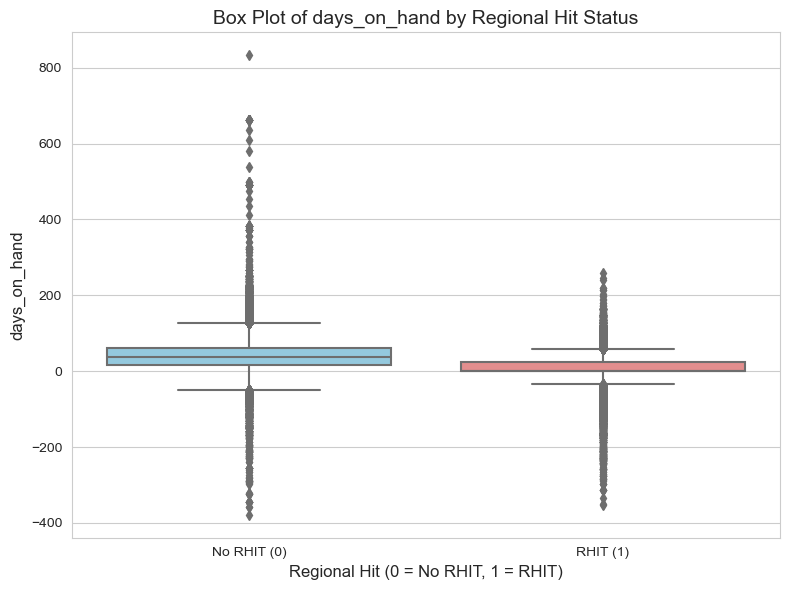

Saved plot: boxplot_ss_units_left_pct.png


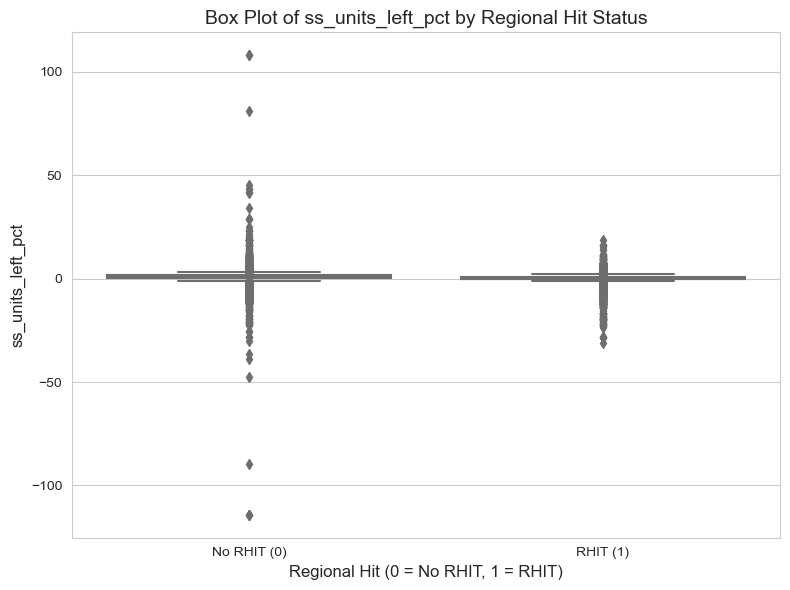

Saved plot: boxplot_ltm_median.png


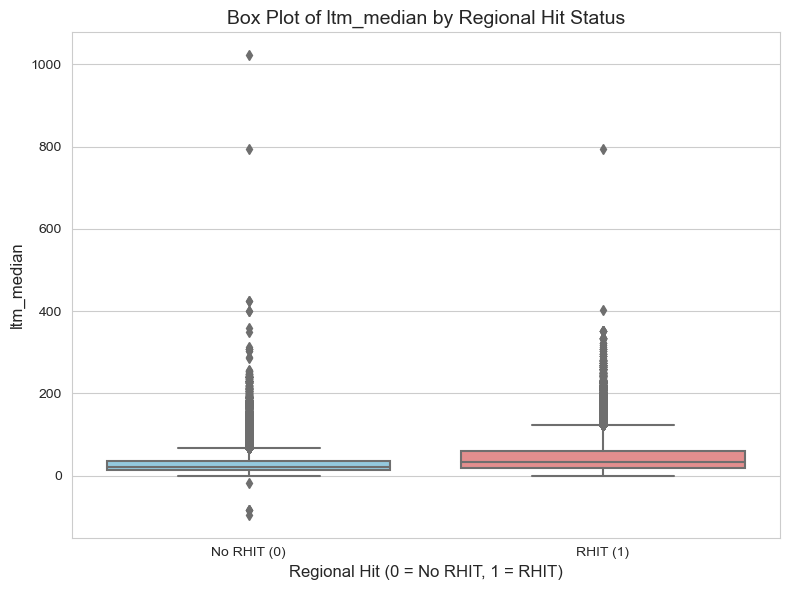

Saved plot: boxplot_ltm_90pct_difference_wks.png


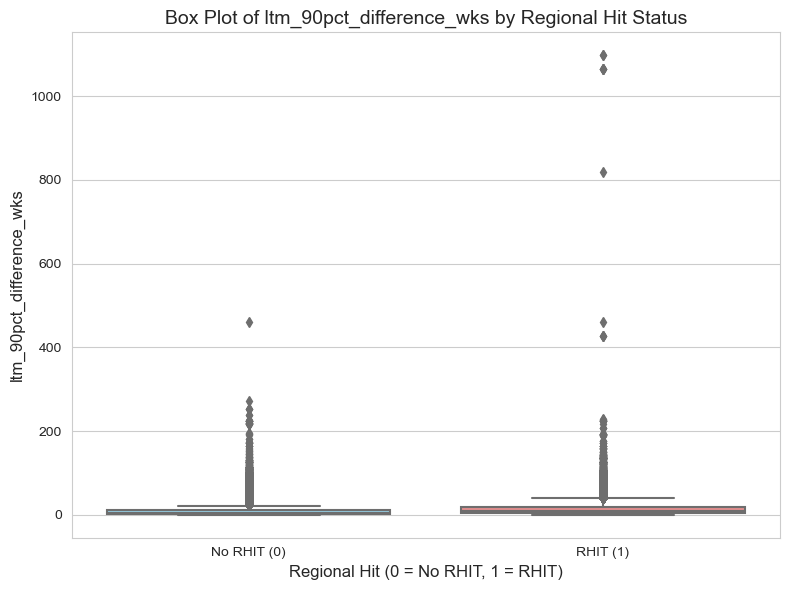

Saved plot: boxplot_ots_pct.png


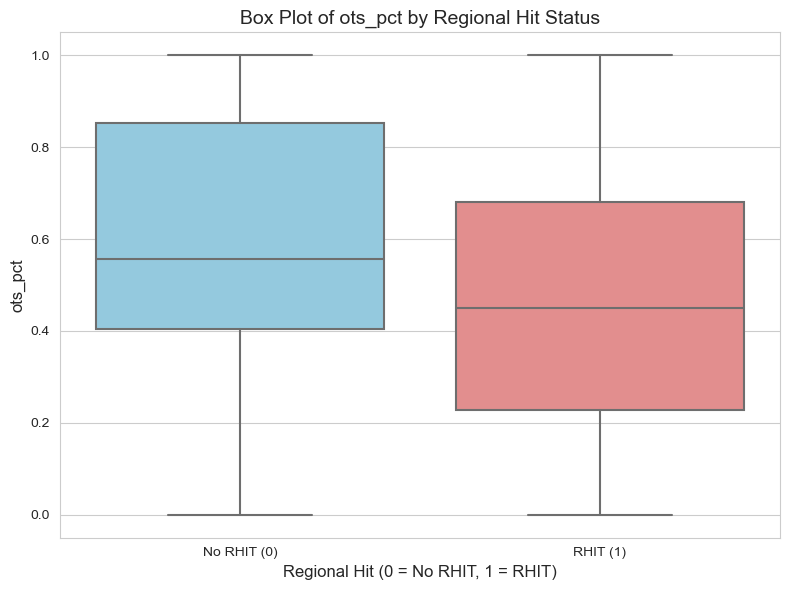

Saved plot: boxplot_no_ship_ratio.png


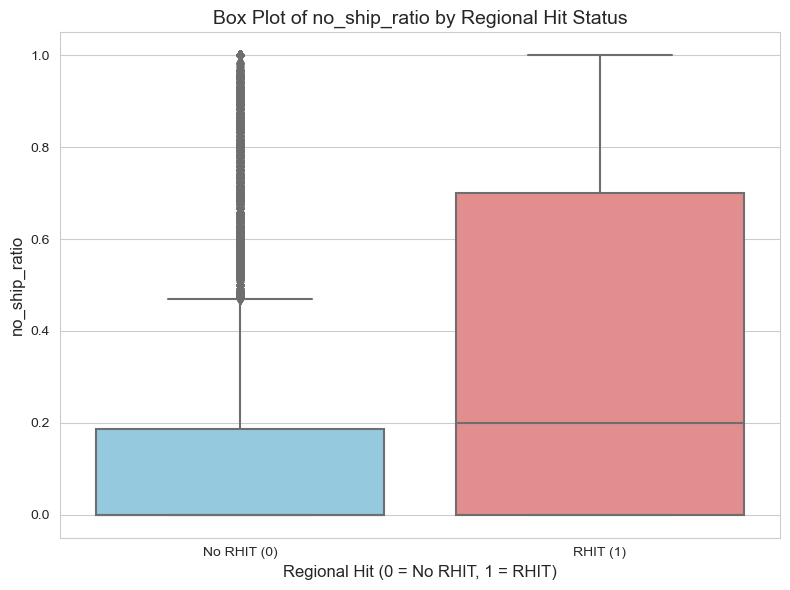


--- Interpretation of Box Plots (Example for 'days_on_hand'): ---
If the box for 'RHIT (1)' is noticeably lower than for 'No RHIT (0)', it means RHITs tend to occur with lower days_on_hand.
Business Sense: Less stock on hand provides less buffer against demand or delays, making stockouts more likely.


In [14]:
# --- 2. Comparative Box Plots for Key Numerical Features ---
numerical_features_for_comparison = [
    'days_on_hand',
    'ss_units_left_pct',
    'ltm_median',
    'ltm_90pct_difference_wks',
    'ots_pct',
    'no_ship_ratio'
]
print(f"\nGenerating Comparative Box Plots for: {', '.join(numerical_features_for_comparison)}")

for feature in numerical_features_for_comparison:
    if feature not in df.columns:
        print(f"Warning: Feature '{feature}' not found for Box Plot. Skipping.")
        continue
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='rhit_label', y=feature, data=df, palette=['skyblue', 'lightcoral'])
    plt.title(f'Box Plot of {feature} by Regional Hit Status', fontsize=14)
    plt.xlabel('Regional Hit (0 = No RHIT, 1 = RHIT)', fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.xticks([0, 1], ['No RHIT (0)', 'RHIT (1)']) # Ensure correct labels
    plt.tight_layout()
    plt.savefig(f'boxplot_{feature}.png')
    print(f"Saved plot: boxplot_{feature}.png")
    plt.show()
    plt.close()

print("\n--- Interpretation of Box Plots (Example for 'days_on_hand'): ---")
print("If the box for 'RHIT (1)' is noticeably lower than for 'No RHIT (0)', it means RHITs tend to occur with lower days_on_hand.")
print("Business Sense: Less stock on hand provides less buffer against demand or delays, making stockouts more likely.")


Generating Comparative Density Plots for: days_on_hand, ss_units_left_pct, ltm_median, ltm_90pct_difference_wks, ots_pct, no_ship_ratio
Saved plot: density_plot_days_on_hand.png


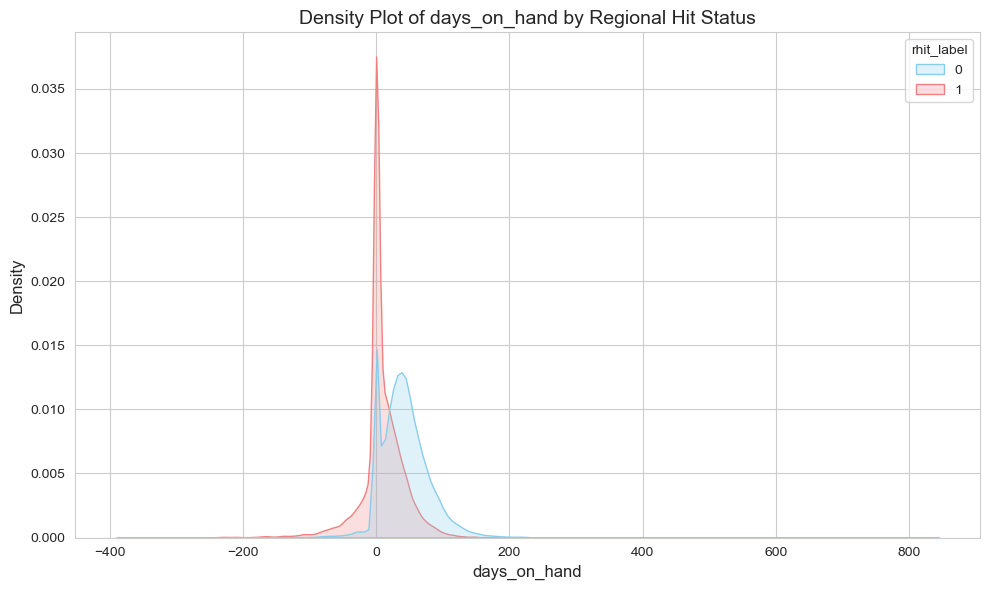

Saved plot: density_plot_ss_units_left_pct.png


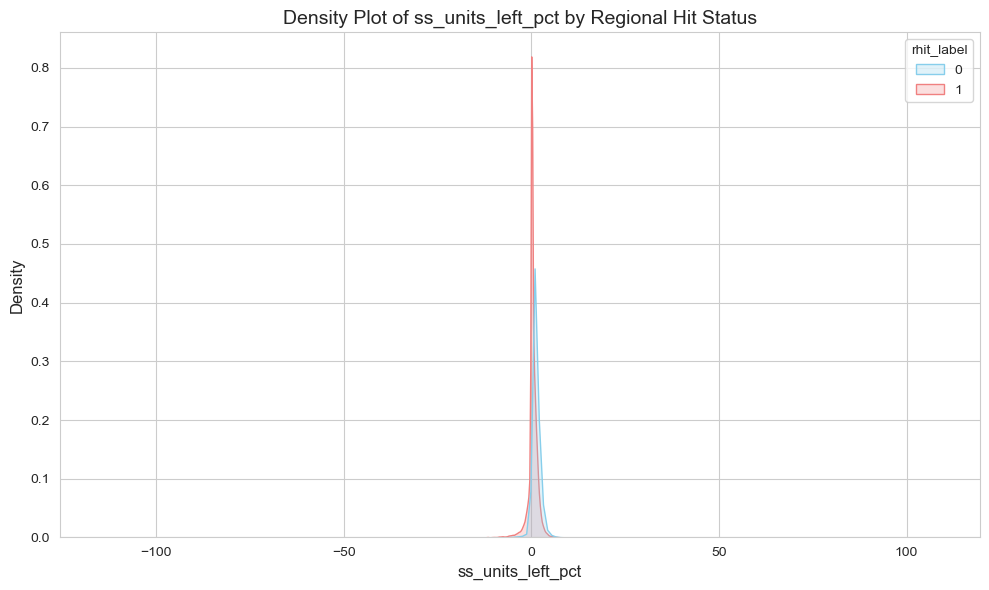

Saved plot: density_plot_ltm_median.png


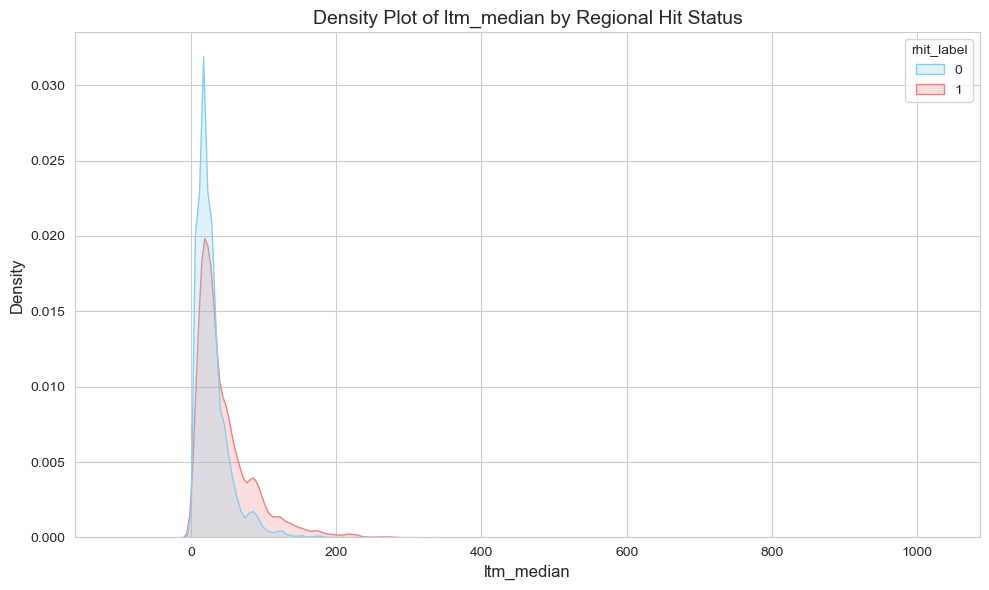

Saved plot: density_plot_ltm_90pct_difference_wks.png


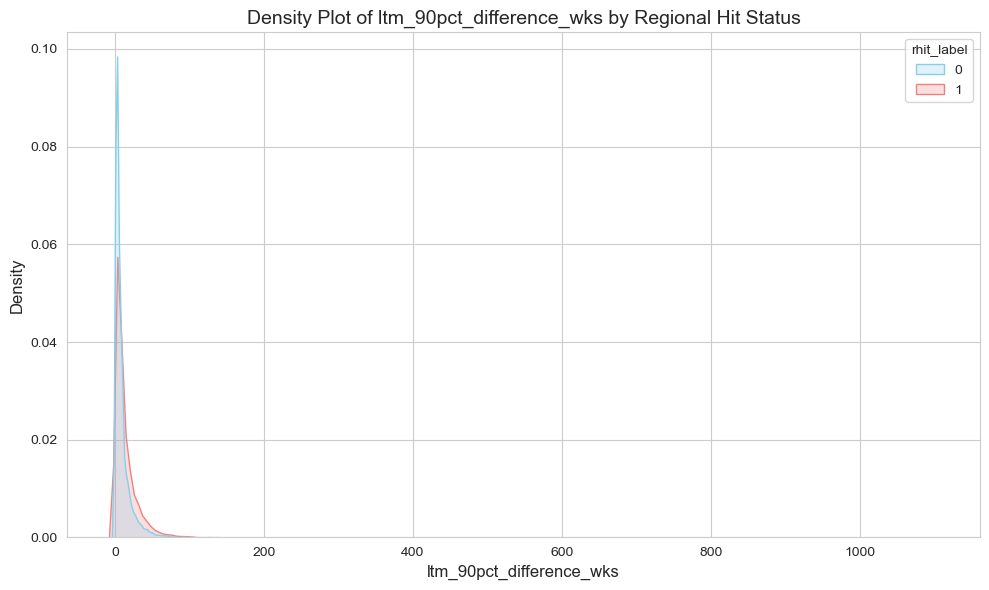

Saved plot: density_plot_ots_pct.png


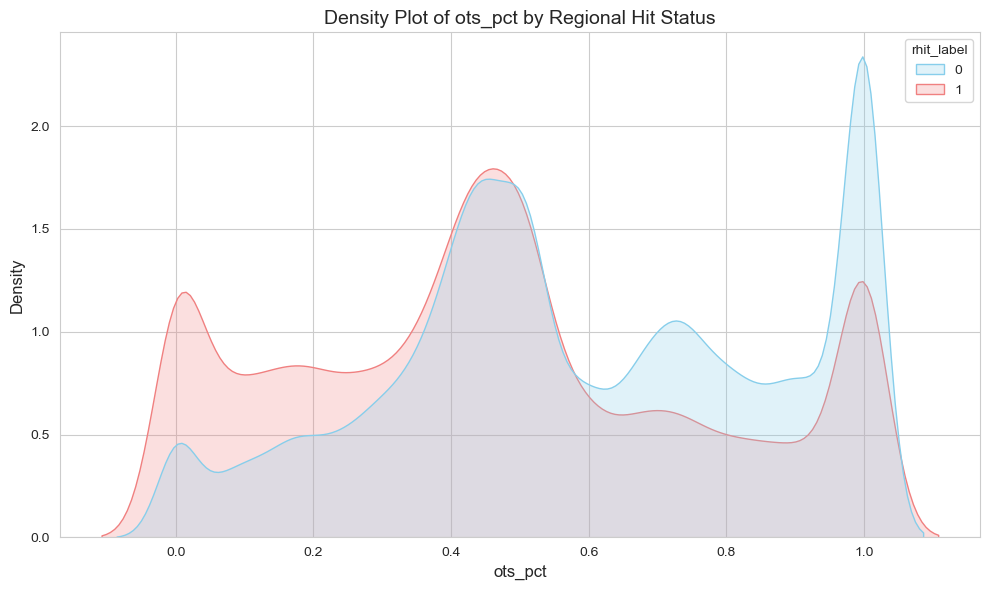

Saved plot: density_plot_no_ship_ratio.png


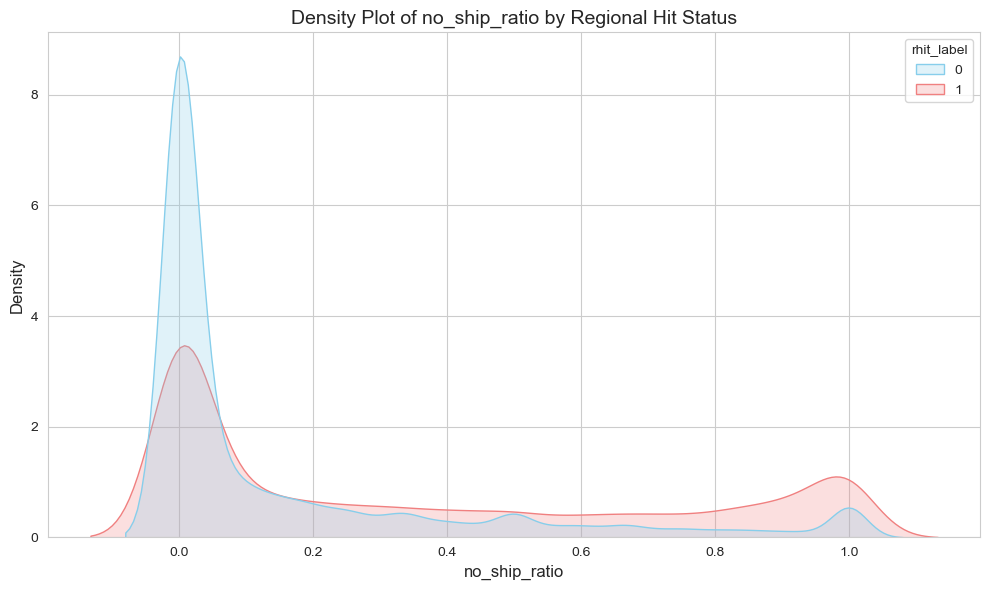


--- Interpretation of Density Plots (Example for 'ltm_median'): ---
If the density peak for 'RHIT (1)' is shifted to the right (higher values) compared to 'No RHIT (0)',
it suggests that RHITs are more common when median lead times are longer.
Business Sense: Longer and more uncertain replenishment times make it harder to match supply with demand, increasing stockout risk.


In [15]:
# --- 3. Comparative Density Plots ---
print(f"\nGenerating Comparative Density Plots for: {', '.join(numerical_features_for_comparison)}")
for feature in numerical_features_for_comparison:
    if feature not in df.columns:
        print(f"Warning: Feature '{feature}' not found for Density Plot. Skipping.")
        continue
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df, x=feature, hue='rhit_label', fill=True, common_norm=False, palette=['skyblue', 'lightcoral'])
    plt.title(f'Density Plot of {feature} by Regional Hit Status', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    handles, labels = plt.gca().get_legend_handles_labels()
    if handles: # Check if legend items exist
         new_labels = ['No RHIT (0)' if label == '0' else 'RHIT (1)' for label in labels]
         plt.legend(title='Regional Hit', handles=handles, labels=new_labels)
    plt.tight_layout()
    plt.savefig(f'density_plot_{feature}.png')
    print(f"Saved plot: density_plot_{feature}.png")
    plt.show()
    plt.close()

print("\n--- Interpretation of Density Plots (Example for 'ltm_median'): ---")
print("If the density peak for 'RHIT (1)' is shifted to the right (higher values) compared to 'No RHIT (0)',")
print("it suggests that RHITs are more common when median lead times are longer.")
print("Business Sense: Longer and more uncertain replenishment times make it harder to match supply with demand, increasing stockout risk.")



Generating Bar Chart for 'doh_less_ss' vs. RHIT Rate...
Saved plot: rhit_rate_by_doh_less_ss.png


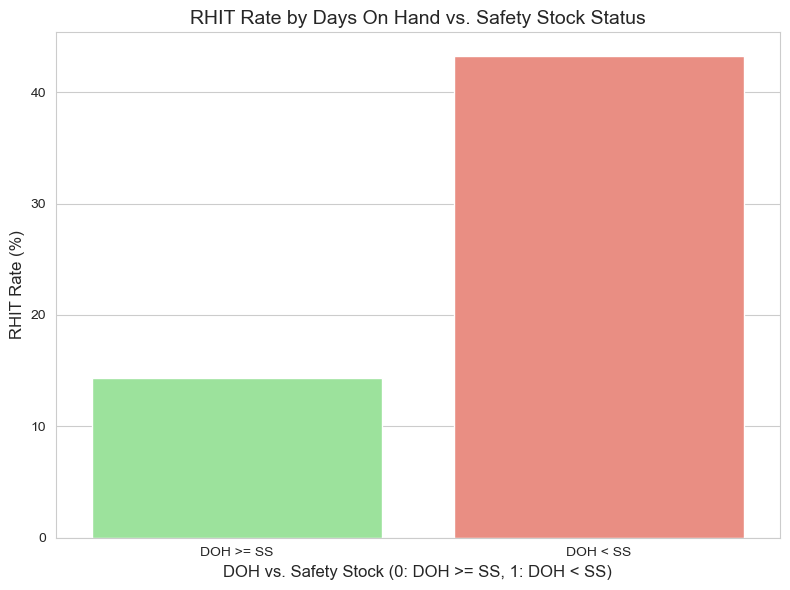


--- Interpretation of Bar Chart ('doh_less_ss' vs. RHIT Rate): ---
This chart shows the percentage of times a RHIT occurred for each state of 'doh_less_ss'.
A significantly taller bar for 'DOH < SS' means that being below safety stock drastically increases the RHIT probability.
Business Sense: Safety stock is designed to be a buffer. Operating below it is inherently risky and expected to lead to more stockouts.


In [17]:
# Bar Chart for 'doh_less_ss' vs. RHIT Rate ---
print("\nGenerating Bar Chart for 'doh_less_ss' vs. RHIT Rate...")
if 'doh_less_ss' in df.columns and 'rhit_label' in df.columns:
    rhit_rate_by_doh_ss = df.groupby('doh_less_ss')['rhit_label'].mean().reset_index()
    rhit_rate_by_doh_ss['rhit_label'] = rhit_rate_by_doh_ss['rhit_label'] * 100 # Convert to percentage

    plt.figure(figsize=(8, 6))
    sns.barplot(x='doh_less_ss', y='rhit_label', data=rhit_rate_by_doh_ss, palette=['lightgreen', 'salmon'])
    plt.title('RHIT Rate by Days On Hand vs. Safety Stock Status', fontsize=14)
    plt.xlabel('DOH vs. Safety Stock (0: DOH >= SS, 1: DOH < SS)', fontsize=12)
    plt.ylabel('RHIT Rate (%)', fontsize=12)
    plt.xticks([0,1],['DOH >= SS', 'DOH < SS'])
    plt.tight_layout()
    plt.savefig('rhit_rate_by_doh_less_ss.png')
    print("Saved plot: rhit_rate_by_doh_less_ss.png")
    plt.show()
    plt.close()

    print("\n--- Interpretation of Bar Chart ('doh_less_ss' vs. RHIT Rate): ---")
    print("This chart shows the percentage of times a RHIT occurred for each state of 'doh_less_ss'.")
    print("A significantly taller bar for 'DOH < SS' means that being below safety stock drastically increases the RHIT probability.")
    print("Business Sense: Safety stock is designed to be a buffer. Operating below it is inherently risky and expected to lead to more stockouts.")
else:
    print("Warning: 'doh_less_ss' or 'rhit_label' not found. Skipping this chart.")



Generating Pair Plot for: days_on_hand, ltm_median, ots_pct, rhit_label (This might take a moment)...


/Users/aryanabhinavjaisiv/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Saved plot: pair_plot_selected_features.png


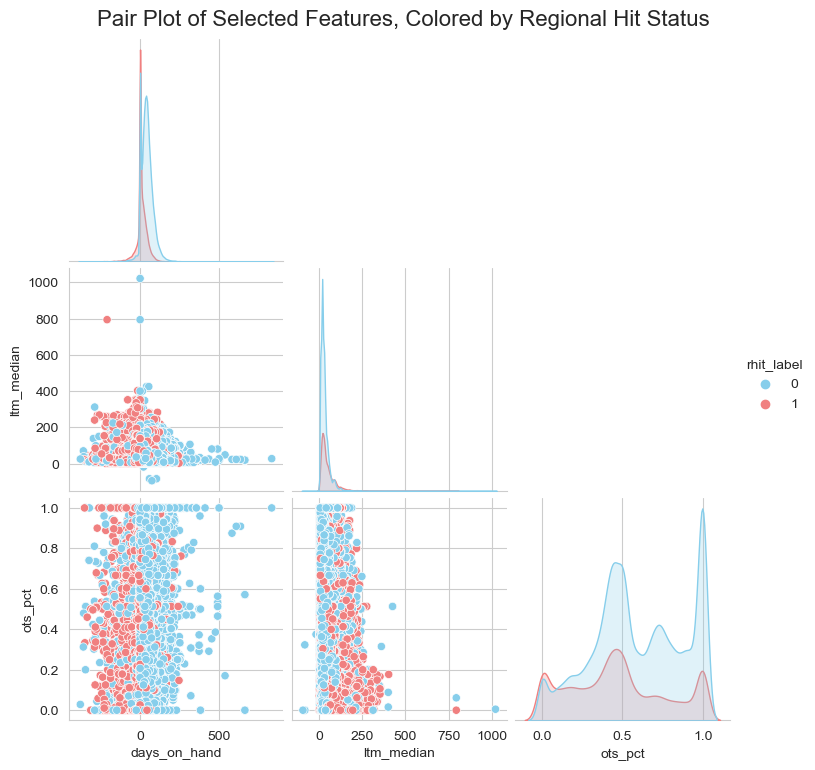


All requested visualizations generated and saved as PNG files.
Review these plots to identify features and value ranges strongly associated with RHITs (rhit_label=1).
This understanding is crucial for business decisions like adjusting inventory policies,
evaluating supplier performance, or improving demand forecasting.


In [18]:
# --- 5. Pair Plot (for a small subset of features) ---
# Pair plots can be resource-intensive if too many features are used.
pair_plot_features = ['days_on_hand', 'ltm_median', 'ots_pct', 'rhit_label']
# Check if all features for pair plot exist
missing_pair_features = [f for f in pair_plot_features if f not in df.columns]

if not missing_pair_features:
    print(f"\nGenerating Pair Plot for: {', '.join(pair_plot_features)} (This might take a moment)...")
    sns.pairplot(df[pair_plot_features], hue='rhit_label', palette={0: 'skyblue', 1: 'lightcoral'}, corner=True)
    plt.suptitle('Pair Plot of Selected Features, Colored by Regional Hit Status', y=1.02, fontsize=16)
    plt.savefig('pair_plot_selected_features.png')
    print("Saved plot: pair_plot_selected_features.png")
    plt.show()
    plt.close()
else:
    print(f"\nSkipping Pair Plot because one or more features are missing: {', '.join(missing_pair_features)}")


print("\nAll requested visualizations generated and saved as PNG files.")
print("Review these plots to identify features and value ranges strongly associated with RHITs (rhit_label=1).")
print("This understanding is crucial for business decisions like adjusting inventory policies,")
print("evaluating supplier performance, or improving demand forecasting.")


Generating Bar Chart: RHIT Rate by 'doh_less_ss' Status...
Saved plot: bar_rhit_rate_by_doh_vs_ss.png


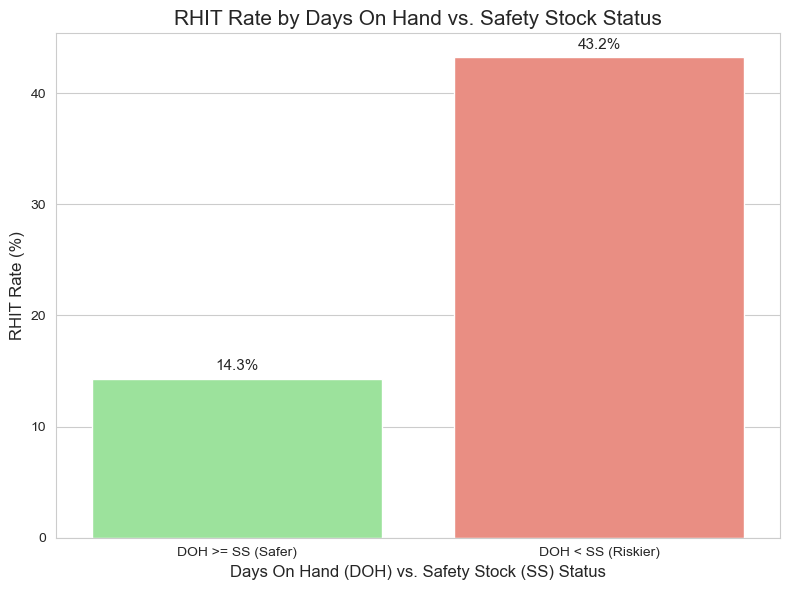

Business Insight: This chart directly shows how much the risk of a stockout (RHIT Rate) increases when inventory falls below safety stock levels. A significantly higher bar for 'DOH < SS' indicates this is a strong pattern.


In [19]:
# --- Visualization 1: Bar Chart: RHIT Rate by "Days On Hand vs. Safety Stock" Status ---
print("\nGenerating Bar Chart: RHIT Rate by 'doh_less_ss' Status...")
if 'doh_less_ss' in df.columns and 'rhit_label' in df.columns:
    # Calculate RHIT rate for each category of 'doh_less_ss'
    # The mean of 'rhit_label' (0s and 1s) gives the proportion of 1s (i.e., RHIT Rate)
    rhit_rate_summary = df.groupby('doh_less_ss')['rhit_label'].mean().reset_index()
    rhit_rate_summary['rhit_label'] = rhit_rate_summary['rhit_label'] * 100 # Convert to percentage

    plt.figure(figsize=(8, 6))
    barplot = sns.barplot(x='doh_less_ss', y='rhit_label', data=rhit_rate_summary, palette=['lightgreen', 'salmon'])
    
    plt.title('RHIT Rate by Days On Hand vs. Safety Stock Status', fontsize=15)
    plt.xlabel('Days On Hand (DOH) vs. Safety Stock (SS) Status', fontsize=12)
    plt.ylabel('RHIT Rate (%)', fontsize=12)
    plt.xticks([0, 1], ['DOH >= SS (Safer)', 'DOH < SS (Riskier)']) # Set custom x-axis labels

    # Add percentage labels on top of bars
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.1f') + '%', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points',
                       fontsize=11)

    plt.tight_layout()
    filename = 'bar_rhit_rate_by_doh_vs_ss.png'
    plt.savefig(filename)
    print(f"Saved plot: {filename}")
    plt.show() # Display the plot in Jupyter Notebook
    plt.close()
    print("Business Insight: This chart directly shows how much the risk of a stockout (RHIT Rate) increases when inventory falls below safety stock levels. A significantly higher bar for 'DOH < SS' indicates this is a strong pattern.")
else:
    print("Skipping 'RHIT Rate by doh_less_ss Status' chart: Required columns missing.")


Generating Comparative Box Plots for Stock Levels: days_on_hand, ss_units_left_pct...
Saved plot: boxplot_stock_level_days_on_hand_vs_rhit.png


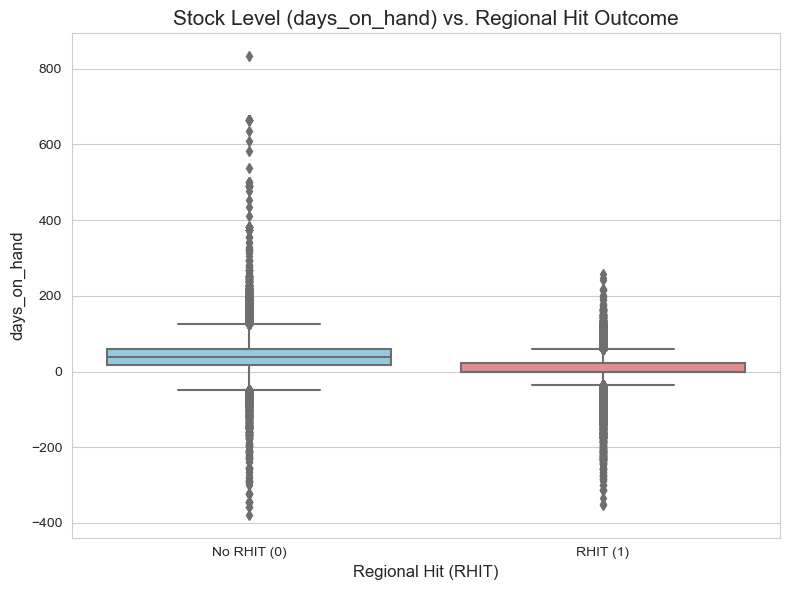

Business Insight for days_on_hand: This plot compares the distribution of 'days_on_hand'. If the box for 'RHIT (1)' is shifted towards lower values, it means lower stock levels (or buffer) are associated with a higher chance of stockout.
Saved plot: boxplot_stock_level_ss_units_left_pct_vs_rhit.png


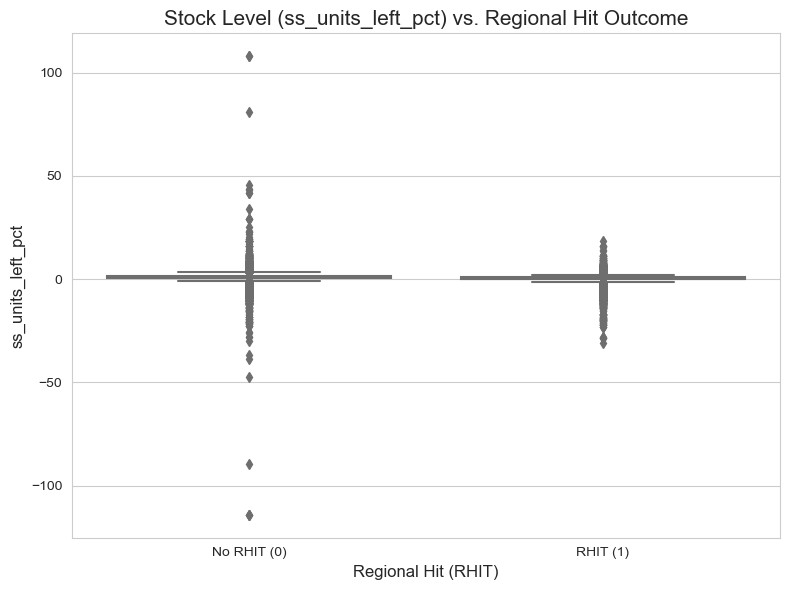

Business Insight for ss_units_left_pct: This plot compares the distribution of 'ss_units_left_pct'. If the box for 'RHIT (1)' is shifted towards lower values, it means lower stock levels (or buffer) are associated with a higher chance of stockout.


In [20]:
# --- Visualization 2: Comparative Box Plots: "Stock Levels vs. RHIT Outcome" ---
stock_level_features = ['days_on_hand', 'ss_units_left_pct']
print(f"\nGenerating Comparative Box Plots for Stock Levels: {', '.join(stock_level_features)}...")

for feature in stock_level_features:
    if feature not in df.columns or 'rhit_label' not in df.columns:
        print(f"Skipping Box Plot for '{feature}': Column missing.")
        continue

    plt.figure(figsize=(8, 6))
    sns.boxplot(x='rhit_label', y=feature, data=df, palette=['skyblue', 'lightcoral'])
    plt.title(f'Stock Level ({feature}) vs. Regional Hit Outcome', fontsize=15)
    plt.xlabel('Regional Hit (RHIT)', fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.xticks([0, 1], ['No RHIT (0)', 'RHIT (1)'])
    
    plt.tight_layout()
    filename = f'boxplot_stock_level_{feature}_vs_rhit.png'
    plt.savefig(filename)
    print(f"Saved plot: {filename}")
    plt.show() # Display the plot
    plt.close()
    print(f"Business Insight for {feature}: This plot compares the distribution of '{feature}'. If the box for 'RHIT (1)' is shifted towards lower values, it means lower stock levels (or buffer) are associated with a higher chance of stockout.")


Generating Comparative Box Plots for Supplier Reliability & Issue Persistency: no_ship_ratio, ots_pct, days_below_ss...
Saved plot: boxplot_supplier_issue_no_ship_ratio_vs_rhit.png


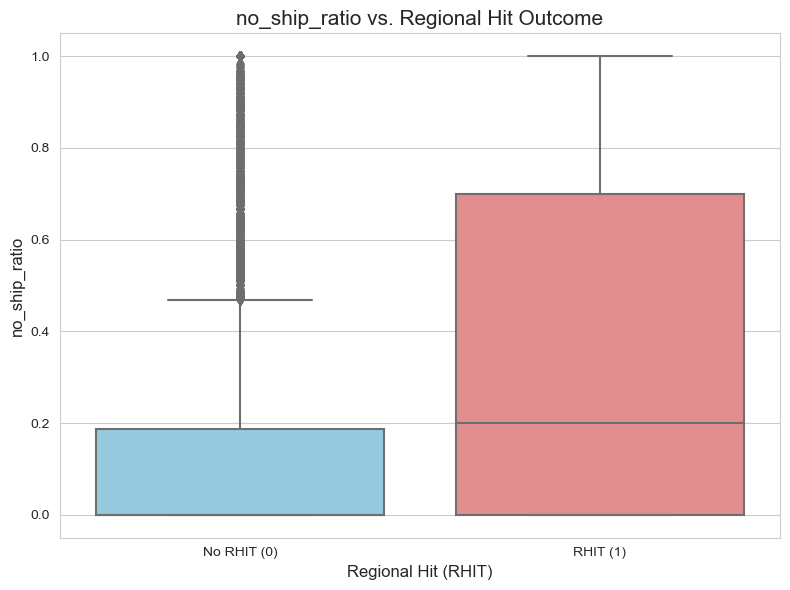

Business Insight for no_ship_ratio: If the 'RHIT (1)' box is shifted higher, it suggests that a greater proportion of non-shipped orders from suppliers is linked to stockouts.
Saved plot: boxplot_supplier_issue_ots_pct_vs_rhit.png


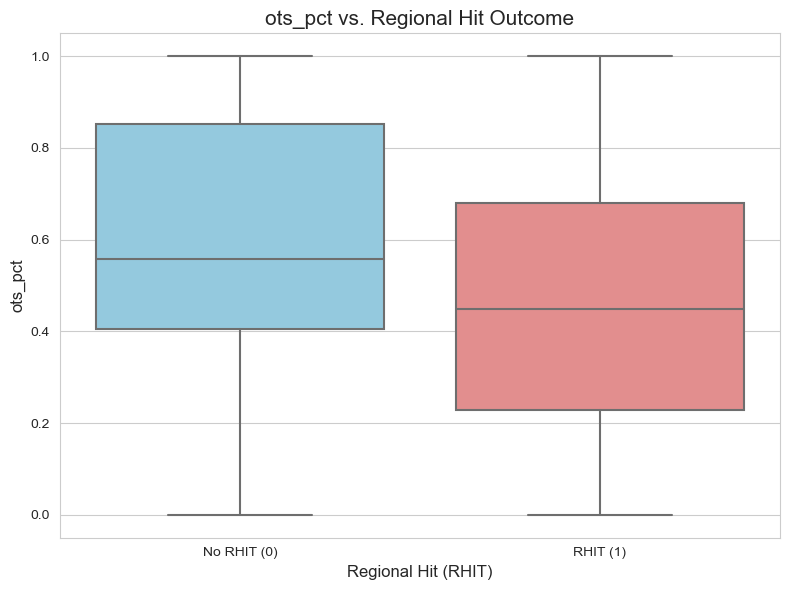

Business Insight for ots_pct: If the 'RHIT (1)' box is shifted lower, it means lower on-time shipping percentages from suppliers are associated with stockouts.
Saved plot: boxplot_supplier_issue_days_below_ss_vs_rhit.png


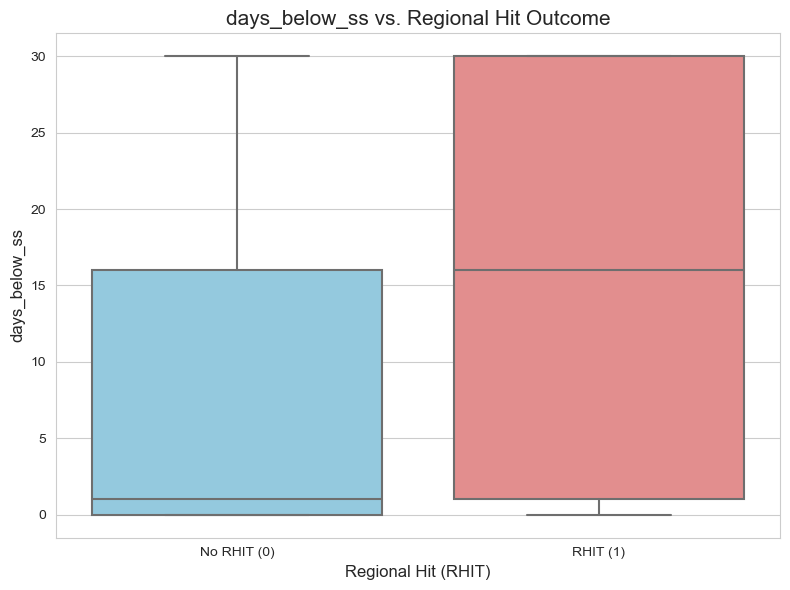

Business Insight for days_below_ss: If the 'RHIT (1)' box is shifted higher, it indicates that spending more days with inventory below safety stock levels is a pattern for stockouts.

All requested Python visualizations generated and saved as PNG files.


In [21]:
# --- Visualization 3: Comparative Box Plots: "Supplier Reliability & Persistency of Issues vs. RHIT Outcome" ---
supplier_reliability_features = ['no_ship_ratio', 'ots_pct', 'days_below_ss']
print(f"\nGenerating Comparative Box Plots for Supplier Reliability & Issue Persistency: {', '.join(supplier_reliability_features)}...")

for feature in supplier_reliability_features:
    if feature not in df.columns or 'rhit_label' not in df.columns:
        print(f"Skipping Box Plot for '{feature}': Column missing.")
        continue

    plt.figure(figsize=(8, 6))
    sns.boxplot(x='rhit_label', y=feature, data=df, palette=['skyblue', 'lightcoral'])
    plt.title(f'{feature} vs. Regional Hit Outcome', fontsize=15)
    plt.xlabel('Regional Hit (RHIT)', fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.xticks([0, 1], ['No RHIT (0)', 'RHIT (1)'])
    
    plt.tight_layout()
    filename = f'boxplot_supplier_issue_{feature}_vs_rhit.png'
    plt.savefig(filename)
    print(f"Saved plot: {filename}")
    plt.show() # Display the plot
    plt.close()
    if feature == 'no_ship_ratio':
        print(f"Business Insight for {feature}: If the 'RHIT (1)' box is shifted higher, it suggests that a greater proportion of non-shipped orders from suppliers is linked to stockouts.")
    elif feature == 'ots_pct':
        print(f"Business Insight for {feature}: If the 'RHIT (1)' box is shifted lower, it means lower on-time shipping percentages from suppliers are associated with stockouts.")
    elif feature == 'days_below_ss':
        print(f"Business Insight for {feature}: If the 'RHIT (1)' box is shifted higher, it indicates that spending more days with inventory below safety stock levels is a pattern for stockouts.")

print("\nAll requested Python visualizations generated and saved as PNG files.")

### Defining Lead time issues 

#### High Lead Time Variability: Delivery times are very unpredictable

#### Poor Supplier On-Time Shipping: Suppliers are often late in shipping
#### Supplier Non-Shipment: Suppliers fail to ship orders


Step 1: Defining and Creating Lead Time Issue Flags...
Threshold for High LTM Variability (ltm_90pct_difference_wks > X): 12.30 weeks
Threshold for Poor OTS (ots_pct < X): 0.36%
Threshold for No-Ship Issue (no_ship_ratio > 0)

Created 'has_lead_time_issue' flag. 88132 instances have at least one LTI.

Generating Visualization 1: Prevalence of Lead Time Issues within RHITs...
Saved plot: bar_lti_prevalence_in_rhits.png


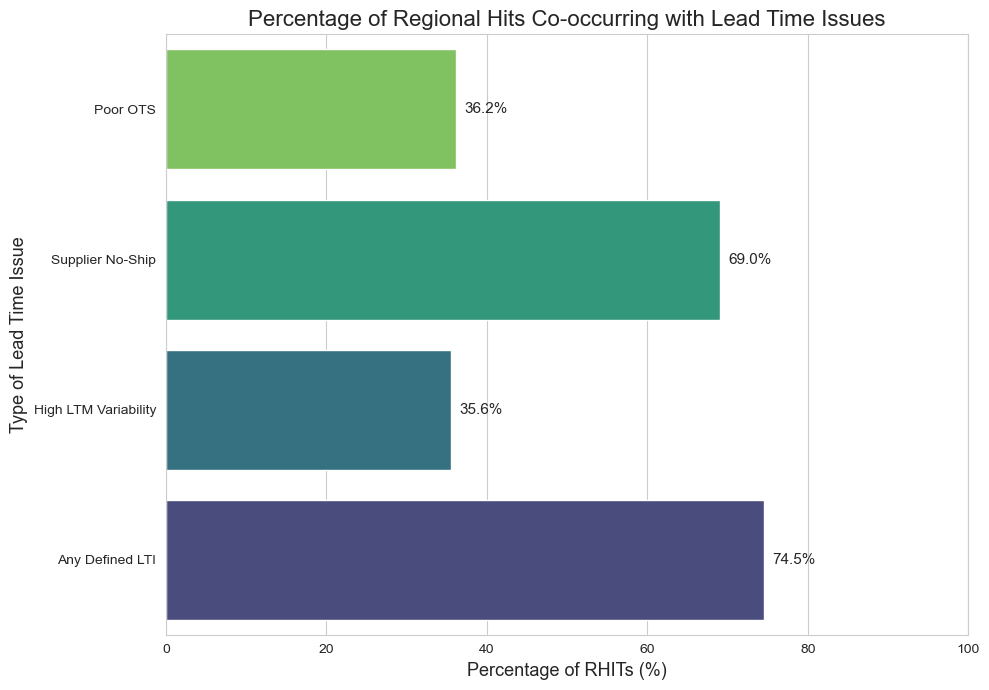

Business Insight V1: This chart shows what percentage of your stockouts (RHITs) were accompanied by specific lead time problems we defined (like high variability, poor supplier shipping, or any non-shipment). A tall bar for 'Any Defined LTI' means lead time issues are frequently present when stockouts happen.


In [22]:
# Step 1: Create Lead Time Issue Flags ---
print("\nStep 1: Defining and Creating Lead Time Issue Flags...")

# Define thresholds (these are examples; you should adjust based on your data/business knowledge)
# For ltm_90pct_difference_wks: Use the 75th percentile as a threshold for "high variability"
ltm_var_threshold = df['ltm_90pct_difference_wks'].quantile(0.75) if not df.empty else 1.0
df['is_ltm_variability_issue'] = (df['ltm_90pct_difference_wks'] > ltm_var_threshold).astype(int)
print(f"Threshold for High LTM Variability (ltm_90pct_difference_wks > X): {ltm_var_threshold:.2f} weeks")

# For ots_pct: Use the 25th percentile as a threshold for "poor OTS"
ots_threshold = df['ots_pct'].quantile(0.25) if not df.empty else 0.6
df['is_ots_issue'] = (df['ots_pct'] < ots_threshold).astype(int)
print(f"Threshold for Poor OTS (ots_pct < X): {ots_threshold:.2f}%")

# For no_ship_ratio: Any non-shipment is an issue
df['is_no_ship_issue'] = (df['no_ship_ratio'] > 0).astype(int)
print(f"Threshold for No-Ship Issue (no_ship_ratio > 0)")

# Composite flag: has_lead_time_issue if any of the specific issues are present
df['has_lead_time_issue'] = df[['is_ltm_variability_issue', 'is_ots_issue', 'is_no_ship_issue']].max(axis=1)
print(f"\nCreated 'has_lead_time_issue' flag. {df['has_lead_time_issue'].sum()} instances have at least one LTI.")

# --- Visualization 1: Bar Chart - Prevalence of Different Lead Time Issues within RHITs ---
print("\nGenerating Visualization 1: Prevalence of Lead Time Issues within RHITs...")
rhit_df = df[df['rhit_label'] == 1].copy() # Consider only instances where RHIT occurred

if not rhit_df.empty:
    lti_columns = ['is_ltm_variability_issue', 'is_ots_issue', 'is_no_ship_issue', 'has_lead_time_issue']
    lti_prevalence = {}
    for col in lti_columns:
        lti_prevalence[col] = (rhit_df[col].sum() / len(rhit_df)) * 100

    lti_names = {
        'is_ltm_variability_issue': 'High LTM Variability',
        'is_ots_issue': 'Poor OTS',
        'is_no_ship_issue': 'Supplier No-Ship',
        'has_lead_time_issue': 'Any Defined LTI'
    }
    
    prevalence_data = pd.DataFrame(list(lti_prevalence.items()), columns=['LTI_Type_Internal', 'Percentage'])
    prevalence_data['LTI_Type'] = prevalence_data['LTI_Type_Internal'].map(lti_names)
    
    # Ensure 'Any Defined LTI' is last for better visual flow
    prevalence_data = prevalence_data.sort_values(by='LTI_Type_Internal', ascending=False)


    plt.figure(figsize=(10, 7))
    barplot_prevalence = sns.barplot(x='Percentage', y='LTI_Type', data=prevalence_data, palette="viridis_r", orient='h')

    plt.title('Percentage of Regional Hits Co-occurring with Lead Time Issues', fontsize=16)
    plt.xlabel('Percentage of RHITs (%)', fontsize=13)
    plt.ylabel('Type of Lead Time Issue', fontsize=13)
    plt.xlim(0, 100) # Percentage scale

    for p in barplot_prevalence.patches:
        width = p.get_width()
        plt.text(width + 1,  # Position for text
                 p.get_y() + p.get_height() / 2., 
                 f'{width:.1f}%', 
                 ha = 'left', va = 'center', fontsize=11)

    plt.tight_layout()
    filename_v1 = 'bar_lti_prevalence_in_rhits.png'
    plt.savefig(filename_v1)
    print(f"Saved plot: {filename_v1}")
    plt.show()
    print("Business Insight V1: This chart shows what percentage of your stockouts (RHITs) were accompanied by specific lead time problems we defined (like high variability, poor supplier shipping, or any non-shipment). A tall bar for 'Any Defined LTI' means lead time issues are frequently present when stockouts happen.")
else:
    print("Skipping Visualization 1: No RHIT instances found in the data or data is empty.")




Generating Visualization 2: RHIT Rate With vs. Without Lead Time Issues...
Saved plot: bar_rhit_rate_by_lti_presence.png


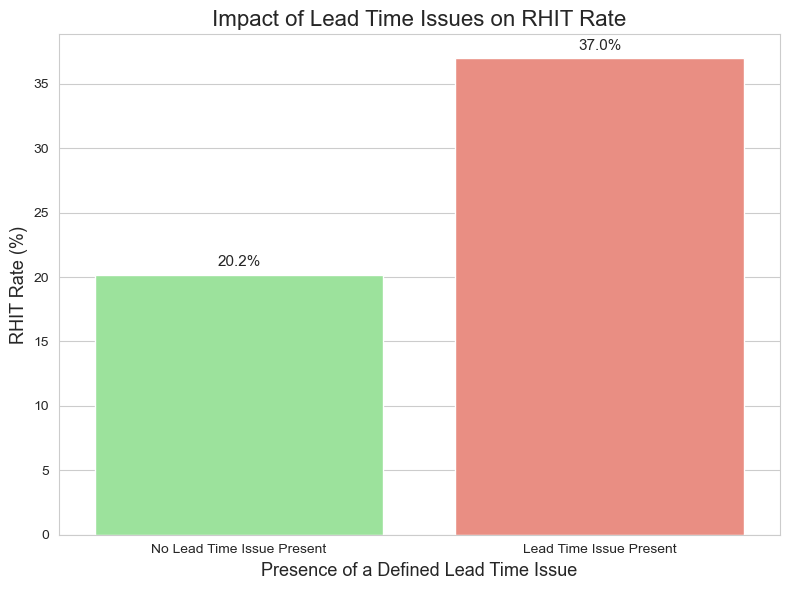

Business Insight V2: This directly compares the stockout rate when lead time issues (as defined) are present versus when they are not. A significantly taller bar for 'Lead Time Issue Present' clearly indicates that these issues increase the probability of a stockout.


In [23]:
# --- Visualization 2: Grouped Bar Chart - RHIT Rate: With vs. Without Lead Time Issues ---
print("\nGenerating Visualization 2: RHIT Rate With vs. Without Lead Time Issues...")
if 'has_lead_time_issue' in df.columns and 'rhit_label' in df.columns and not df.empty:
    rhit_rate_by_lti = df.groupby('has_lead_time_issue')['rhit_label'].mean().reset_index()
    rhit_rate_by_lti['rhit_label'] = rhit_rate_by_lti['rhit_label'] * 100 # Convert to percentage

    plt.figure(figsize=(8, 6))
    barplot_rhit_impact = sns.barplot(x='has_lead_time_issue', y='rhit_label', data=rhit_rate_by_lti, palette=['lightgreen', 'salmon'])
    
    plt.title('Impact of Lead Time Issues on RHIT Rate', fontsize=16)
    plt.xlabel('Presence of a Defined Lead Time Issue', fontsize=13)
    plt.ylabel('RHIT Rate (%)', fontsize=13)
    plt.xticks([0, 1], ['No Lead Time Issue Present', 'Lead Time Issue Present'])

    for p in barplot_rhit_impact.patches:
        barplot_rhit_impact.annotate(format(p.get_height(), '.1f') + '%', 
                                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                                   ha = 'center', va = 'center', 
                                   xytext = (0, 9), 
                                   textcoords = 'offset points',
                                   fontsize=11)
    plt.tight_layout()
    filename_v2 = 'bar_rhit_rate_by_lti_presence.png'
    plt.savefig(filename_v2)
    print(f"Saved plot: {filename_v2}")
    plt.show()
    print("Business Insight V2: This directly compares the stockout rate when lead time issues (as defined) are present versus when they are not. A significantly taller bar for 'Lead Time Issue Present' clearly indicates that these issues increase the probability of a stockout.")
else:
    print("Skipping Visualization 2: Required columns missing or data is empty.")



Generating Visualization 3: Comparative Box Plots for Lead Time Metrics: ltm_90pct_difference_wks, ots_pct, no_ship_ratio...
Saved plot: boxplot_lt_metric_ltm_90pct_difference_wks_vs_rhit.png


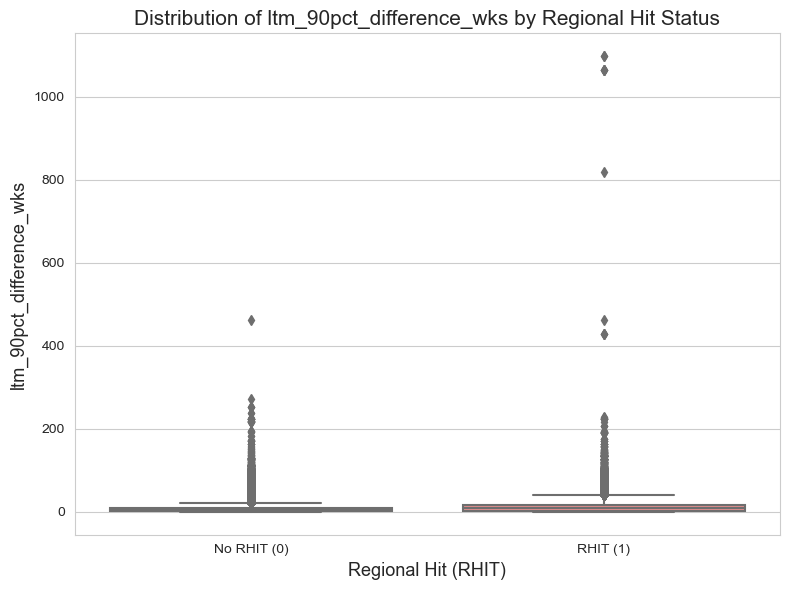

Business Insight V3 (ltm_90pct_difference_wks): This plot shows if the typical values and spread of 'ltm_90pct_difference_wks' are different when a stockout happens. For example, for 'ltm_90pct_difference_wks' or 'no_ship_ratio', you'd look to see if the 'RHIT (1)' box is shifted towards higher values. For 'ots_pct', you'd look for a shift towards lower values for the 'RHIT (1)' box. This helps confirm that 'worse' lead time characteristics are associated with stockouts.
Saved plot: boxplot_lt_metric_ots_pct_vs_rhit.png


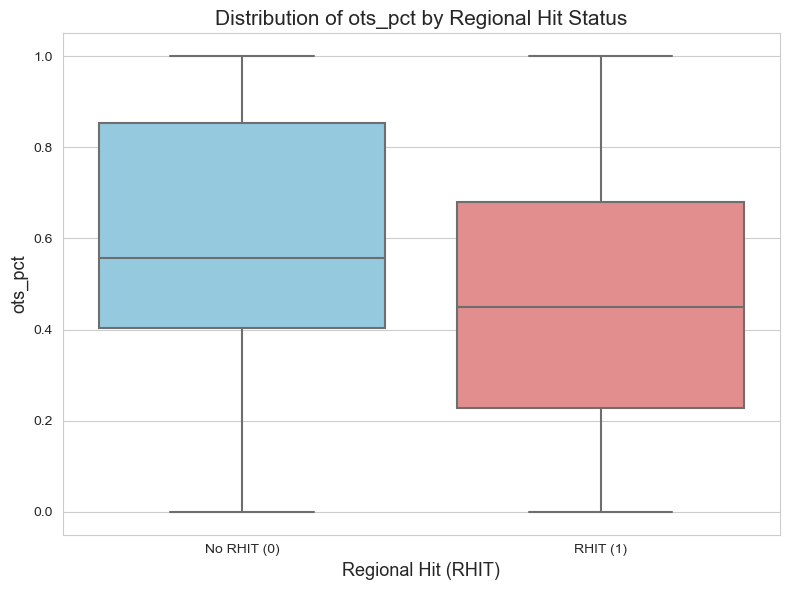

Business Insight V3 (ots_pct): This plot shows if the typical values and spread of 'ots_pct' are different when a stockout happens. For example, for 'ltm_90pct_difference_wks' or 'no_ship_ratio', you'd look to see if the 'RHIT (1)' box is shifted towards higher values. For 'ots_pct', you'd look for a shift towards lower values for the 'RHIT (1)' box. This helps confirm that 'worse' lead time characteristics are associated with stockouts.
Saved plot: boxplot_lt_metric_no_ship_ratio_vs_rhit.png


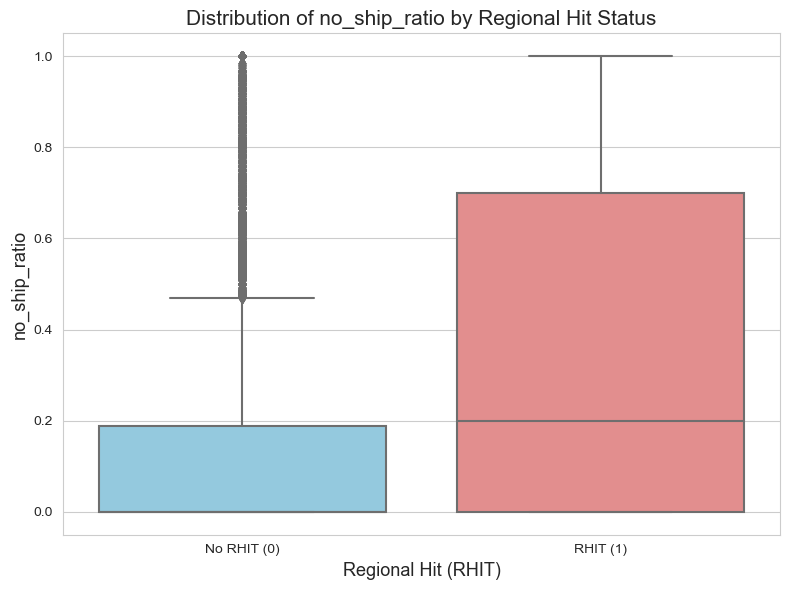

Business Insight V3 (no_ship_ratio): This plot shows if the typical values and spread of 'no_ship_ratio' are different when a stockout happens. For example, for 'ltm_90pct_difference_wks' or 'no_ship_ratio', you'd look to see if the 'RHIT (1)' box is shifted towards higher values. For 'ots_pct', you'd look for a shift towards lower values for the 'RHIT (1)' box. This helps confirm that 'worse' lead time characteristics are associated with stockouts.

All Python visualizations generated and saved as PNG files.
These plots should help stakeholders understand the extent and nature of lead time issues contributing to regional hits.


In [24]:
# --- Visualization 3: Comparative Box Plots for Key Lead Time Metrics vs. RHIT Outcome ---
lt_metrics_for_boxplot = ['ltm_90pct_difference_wks', 'ots_pct', 'no_ship_ratio']
print(f"\nGenerating Visualization 3: Comparative Box Plots for Lead Time Metrics: {', '.join(lt_metrics_for_boxplot)}...")

for feature in lt_metrics_for_boxplot:
    if feature not in df.columns or 'rhit_label' not in df.columns or df.empty:
        print(f"Skipping Box Plot for '{feature}': Column missing or data is empty.")
        continue

    plt.figure(figsize=(8, 6))
    sns.boxplot(x='rhit_label', y=feature, data=df, palette=['skyblue', 'lightcoral'])
    plt.title(f'Distribution of {feature} by Regional Hit Status', fontsize=15)
    plt.xlabel('Regional Hit (RHIT)', fontsize=13)
    plt.ylabel(feature, fontsize=13)
    plt.xticks([0, 1], ['No RHIT (0)', 'RHIT (1)'])
    
    plt.tight_layout()
    filename_v3 = f'boxplot_lt_metric_{feature}_vs_rhit.png'
    plt.savefig(filename_v3)
    print(f"Saved plot: {filename_v3}")
    plt.show()
    print(f"Business Insight V3 ({feature}): This plot shows if the typical values and spread of '{feature}' are different when a stockout happens. For example, for 'ltm_90pct_difference_wks' or 'no_ship_ratio', you'd look to see if the 'RHIT (1)' box is shifted towards higher values. For 'ots_pct', you'd look for a shift towards lower values for the 'RHIT (1)' box. This helps confirm that 'worse' lead time characteristics are associated with stockouts.")

print("\nAll Python visualizations generated and saved as PNG files.")
print("These plots should help stakeholders understand the extent and nature of lead time issues contributing to regional hits.")


In [25]:
# Set a global style for the plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Default figure size

# --- Part 1: Analyzing "Bad Lead Times" ---
print("\n--- Part 1: Analyzing the Impact of 'Bad Lead Times' ---")

# Step 1.1: Define and Create Lead Time Issue Flags
print("\nStep 1.1: Defining and Creating Lead Time Issue Flags...")
if all(col in df.columns for col in ['ltm_90pct_difference_wks', 'ots_pct', 'no_ship_ratio']):
    ltm_var_threshold = df['ltm_90pct_difference_wks'].quantile(0.75) # Top 25% as "high variability"
    df['is_ltm_variability_issue'] = (df['ltm_90pct_difference_wks'] > ltm_var_threshold).astype(int)
    print(f"  - Threshold for High LTM Variability (ltm_90pct_difference_wks > X): {ltm_var_threshold:.2f} weeks")

    ots_threshold = df['ots_pct'].quantile(0.25) # Bottom 25% as "poor OTS"
    df['is_ots_issue'] = (df['ots_pct'] < ots_threshold).astype(int)
    print(f"  - Threshold for Poor OTS (ots_pct < X): {ots_threshold:.2f}")

    df['is_no_ship_issue'] = (df['no_ship_ratio'] > 0).astype(int) # Any non-shipment
    print(f"  - Threshold for No-Ship Issue (no_ship_ratio > 0)")

    df['has_lead_time_issue'] = df[['is_ltm_variability_issue', 'is_ots_issue', 'is_no_ship_issue']].max(axis=1)
    print(f"  - Created 'has_lead_time_issue' flag. {df['has_lead_time_issue'].sum()} instances have at least one LTI.")
    LTI_FLAGS_CREATED = True
else:
    print("  - Could not create LTI flags due to missing columns. LTI visualizations will be skipped.")
    LTI_FLAGS_CREATED = False



--- Part 1: Analyzing the Impact of 'Bad Lead Times' ---

Step 1.1: Defining and Creating Lead Time Issue Flags...
  - Threshold for High LTM Variability (ltm_90pct_difference_wks > X): 12.30 weeks
  - Threshold for Poor OTS (ots_pct < X): 0.36
  - Threshold for No-Ship Issue (no_ship_ratio > 0)
  - Created 'has_lead_time_issue' flag. 88132 instances have at least one LTI.



Visualization 1.A: Prevalence of Lead Time Issues within RHITs


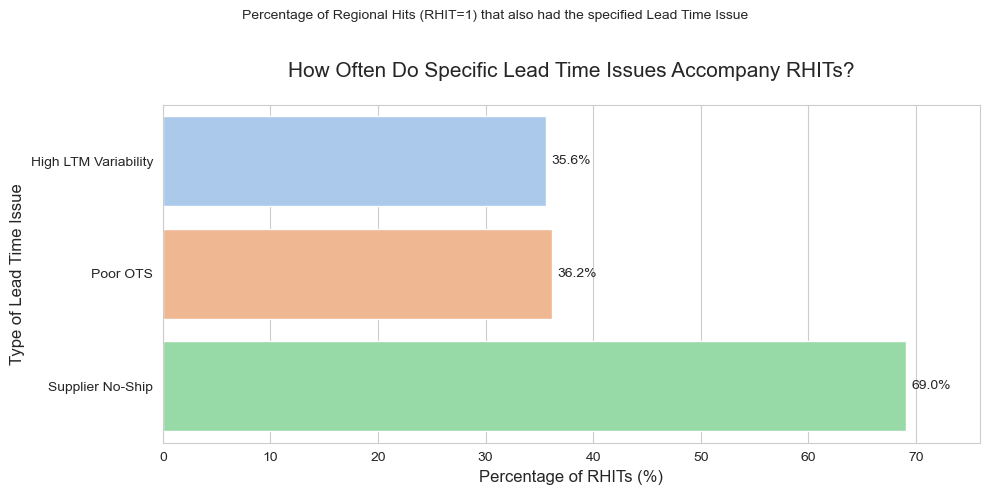

In [37]:
# Visualization 1.A: Prevalence of Different Lead Time Issues within RHITs
if LTI_FLAGS_CREATED and 'rhit_label' in df.columns:
    print("\nVisualization 1.A: Prevalence of Lead Time Issues within RHITs")
    rhit_df = df[df['rhit_label'] == 1].copy()
    if not rhit_df.empty:
        lti_columns = ['is_ltm_variability_issue', 'is_ots_issue', 'is_no_ship_issue']
        lti_prevalence = {}
        for col in lti_columns:
            lti_prevalence[col] = (rhit_df[col].sum() / len(rhit_df)) * 100

        lti_names = {
            'is_ltm_variability_issue': 'High LTM Variability',
            'is_ots_issue': 'Poor OTS',
            'is_no_ship_issue': 'Supplier No-Ship'
        }
        prevalence_data = pd.DataFrame(list(lti_prevalence.items()), columns=['LTI_Type_Internal', 'Percentage'])
        prevalence_data['Lead Time Issue Type'] = prevalence_data['LTI_Type_Internal'].map(lti_names)

        plt.figure(figsize=(10, 5)) # Adjusted for horizontal bar
        barplot_lti_prev = sns.barplot(x='Percentage', y='Lead Time Issue Type', data=prevalence_data, palette="pastel", orient='h')
        plt.title('How Often Do Specific Lead Time Issues Accompany RHITs?', fontsize=15, pad=20)
        plt.suptitle('Percentage of Regional Hits (RHIT=1) that also had the specified Lead Time Issue', fontsize=10)
        plt.xlabel('Percentage of RHITs (%)', fontsize=12)
        plt.ylabel('Type of Lead Time Issue', fontsize=12)
        plt.xlim(0, max(prevalence_data['Percentage'].max() * 1.1, 50)) # Ensure some space for labels

        for p in barplot_lti_prev.patches:
            width = p.get_width()
            plt.text(width + 0.5, p.get_y() + p.get_height() / 2., f'{width:.1f}%', ha='left', va='center')
        
        plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make space for suptitle
        plt.savefig('viz_lti_prevalence_in_rhits.png')
        plt.show()
    else:
        print("  - No RHIT instances to analyze for LTI prevalence.")
else:
    print("  - Skipping LTI Prevalence chart.")


Visualization 1.B: Stockout Rate - With vs. Without Lead Time Issues


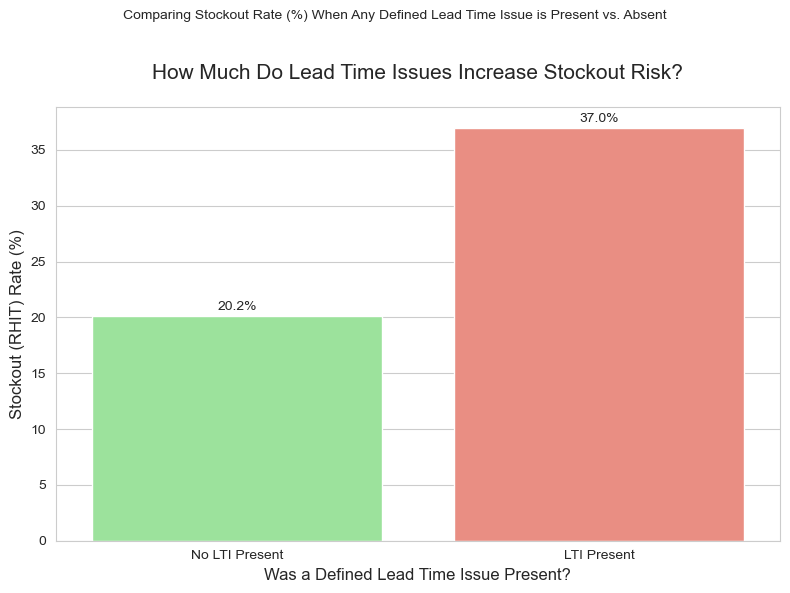

In [29]:
rhit_palette = {0: 'skyblue', 1: 'lightcoral'}
lti_palette = {0: 'lightgreen', 1: 'salmon'} # For presence/absence of issues


# Visualization 1.B: RHIT Rate With vs. Without Any Defined Lead Time Issue
if LTI_FLAGS_CREATED and 'rhit_label' in df.columns:
    print("\nVisualization 1.B: Stockout Rate - With vs. Without Lead Time Issues")
    rhit_rate_by_lti_presence = df.groupby('has_lead_time_issue')['rhit_label'].mean().reset_index()
    rhit_rate_by_lti_presence['rhit_label'] = rhit_rate_by_lti_presence['rhit_label'] * 100

    plt.figure(figsize=(8,6)) # Standard figure size
    barplot_lti_impact = sns.barplot(x='has_lead_time_issue', y='rhit_label', data=rhit_rate_by_lti_presence, palette=lti_palette)
    plt.title('How Much Do Lead Time Issues Increase Stockout Risk?', fontsize=15, pad=20)
    plt.suptitle('Comparing Stockout Rate (%) When Any Defined Lead Time Issue is Present vs. Absent', fontsize=10)
    plt.xlabel('Was a Defined Lead Time Issue Present?', fontsize=12)
    plt.ylabel('Stockout (RHIT) Rate (%)', fontsize=12)
    plt.xticks([0, 1], ['No LTI Present', 'LTI Present'])
    for p in barplot_lti_impact.patches:
        height = p.get_height()
        plt.text(p.get_x() + p.get_width()/2., height + 0.5, f'{height:.1f}%', ha="center")
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig('viz_rhit_rate_by_lti_presence.png')
    plt.show()
else:
    print("  - Skipping RHIT Rate by LTI Presence chart.")

Successfully loaded raw dataset: test_data.csv
Raw dataset shape: (143366, 47)

--- Step 1: Defining 'Poor Forecasting' (Significant Under-forecasting) ---
  - Calculated 'recent_actual_daily_demand'.
  - Calculated 'forecast_performance_ratio'.
  - Defined 'is_significant_underforecast' where forecast is < 70.0% of recent actuals.
  - 24005 instances flagged as significant under-forecasting.

--- Visualization 1: How Often Does Significant Under-forecasting Accompany Stockouts? ---
Saved plot: viz_underforecast_prevalence_in_rhits.png


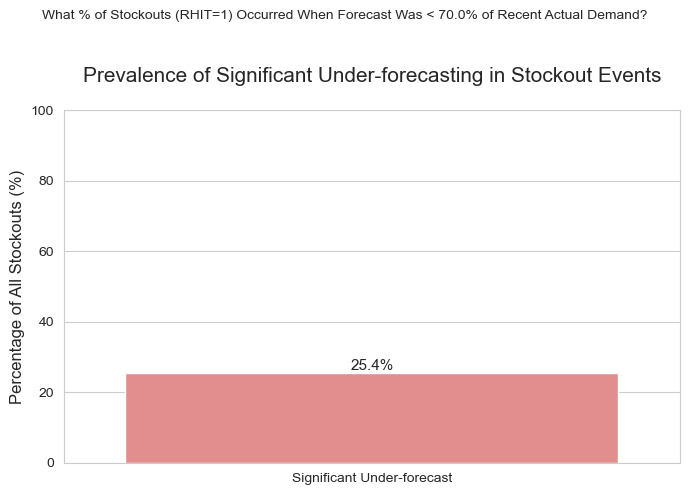


--- Visualization 2: How Much Does Significant Under-forecasting Increase Stockout Risk? ---
Saved plot: viz_rhit_rate_by_forecast_quality.png


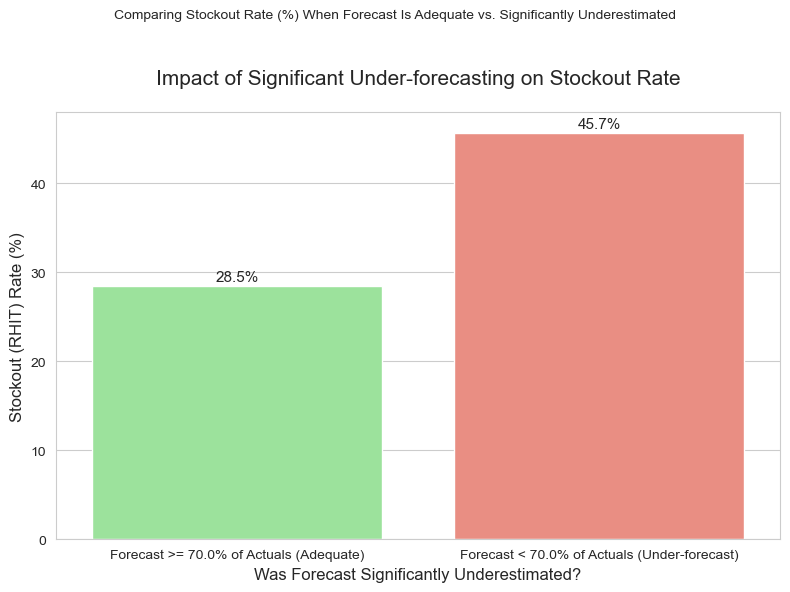


--- Visualization 3: How Does Forecast Performance Differ for Stockouts vs. Non-Stockouts? ---
Saved plot: viz_density_forecast_performance_vs_rhit.png


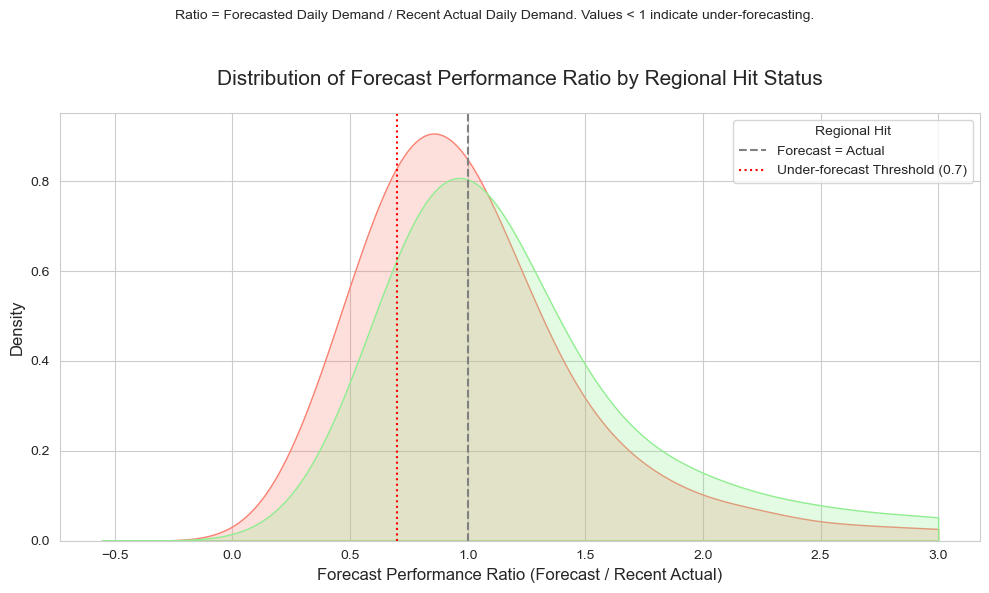


All requested visualizations for 'Poor Forecasting' generated (or attempted).
Remember to adjust filenames, column names, and thresholds to fit your actual raw data.


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Configuration & Data Loading ---
# !!! IMPORTANT: Replace "Paccar_Raw_Data.csv" with your actual raw data file name !!!
RAW_DATA_FILENAME = "test_data.csv"

# !!! IMPORTANT: Adjust these column names to match your raw dataset !!!
RHIT_LABEL_COL = 'rhit_label'  # Column indicating RHIT (0 or 1)
FORECAST_DAILY_COL = 'fcst_daily' # Example: Daily forecast value
ACTUAL_DEMAND_ROLLING_COL = 'dmd_rolling_90d' # Example: Rolling 90-day actual demand
ROLLING_DEMAND_DAYS = 90 # Number of days for the rolling demand

# Define a consistent color palette
rhit_palette_fcst = {0: 'lightgreen', 1: 'salmon'} # For presence/absence of poor forecast

try:
    df_raw = pd.read_csv(RAW_DATA_FILENAME)
    if 'Unnamed: 0' in df_raw.columns: # Common index column to drop
        df_raw = df_raw.drop('Unnamed: 0', axis=1)
    print(f"Successfully loaded raw dataset: {RAW_DATA_FILENAME}")
    print(f"Raw dataset shape: {df_raw.shape}")

    # Check for essential columns
    required_raw_cols = [RHIT_LABEL_COL, FORECAST_DAILY_COL, ACTUAL_DEMAND_ROLLING_COL]
    missing_raw_cols = [col for col in required_raw_cols if col not in df_raw.columns]
    if missing_raw_cols:
        raise ValueError(f"Missing required columns in raw data: {', '.join(missing_raw_cols)}. Please adjust column name variables.")

except FileNotFoundError:
    print(f"Error: '{RAW_DATA_FILENAME}' not found. Please provide the correct path and filename.")
    print("Using a DUMMY DATAFRAME for demonstration. Plots will not reflect actual data patterns.")
    df_raw = pd.DataFrame({
        RHIT_LABEL_COL: np.random.randint(0, 2, 300),
        FORECAST_DAILY_COL: np.random.uniform(5, 50, 300), # Dummy daily forecast
        ACTUAL_DEMAND_ROLLING_COL: np.random.uniform(400, 5000, 300), # Dummy 90-day rolling demand
        # Add a few other typical columns for context if needed by other parts of a notebook
        'ltm_median': np.random.rand(300) * 30 + 5,
        'days_on_hand': np.random.rand(300) * 60
    })
    print(f"Dummy raw dataset shape: {df_raw.shape}")
except ValueError as ve:
    print(ve)
    # Terminate or use dummy if columns are missing to prevent further errors
    print("Cannot proceed without essential columns. Please check your raw data or column name definitions.")
    # Optionally, you could exit or switch to dummy data here as well
    df_raw = pd.DataFrame() # Empty dataframe to stop further processing if critical error

# Set a global style for the plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Proceed only if df_raw is not empty (i.e., data loaded or dummy created successfully)
if not df_raw.empty:
    # --- Step 1: Define "Poor Forecasting" (Focus on Under-forecasting) ---
    print("\n--- Step 1: Defining 'Poor Forecasting' (Significant Under-forecasting) ---")

    # Calculate Recent Actual Daily Demand
    df_raw['recent_actual_daily_demand'] = df_raw[ACTUAL_DEMAND_ROLLING_COL] / ROLLING_DEMAND_DAYS
    
    # Calculate Forecast Performance Ratio (Forecast / Recent Actual)
    # Handle potential division by zero if recent_actual_daily_demand can be 0
    df_raw['forecast_performance_ratio'] = df_raw[FORECAST_DAILY_COL] / df_raw['recent_actual_daily_demand'].replace(0, np.nan)
    df_raw.dropna(subset=['forecast_performance_ratio'], inplace=True) # Drop rows where ratio couldn't be calculated

    # Define threshold for significant under-forecasting
    # Example: Forecast is less than 70% of recent actual demand (Ratio < 0.7)
    # !!! This threshold (0.7) is an example. Adjust based on your business context and data exploration !!!
    UNDER_FORECAST_THRESHOLD = 0.7 
    df_raw['is_significant_underforecast'] = (df_raw['forecast_performance_ratio'] < UNDER_FORECAST_THRESHOLD).astype(int)

    print(f"  - Calculated 'recent_actual_daily_demand'.")
    print(f"  - Calculated 'forecast_performance_ratio'.")
    print(f"  - Defined 'is_significant_underforecast' where forecast is < {UNDER_FORECAST_THRESHOLD*100}% of recent actuals.")
    print(f"  - {df_raw['is_significant_underforecast'].sum()} instances flagged as significant under-forecasting.")

    # --- Visualization 1: Prevalence of Significant Under-forecasting within RHITs ---
    print("\n--- Visualization 1: How Often Does Significant Under-forecasting Accompany Stockouts? ---")
    rhit_df_fcst = df_raw[df_raw[RHIT_LABEL_COL] == 1].copy()

    if not rhit_df_fcst.empty and 'is_significant_underforecast' in rhit_df_fcst.columns:
        underforecast_prevalence_in_rhits = (rhit_df_fcst['is_significant_underforecast'].sum() / len(rhit_df_fcst)) * 100
        
        plt.figure(figsize=(7, 5))
        barplot_fcst_prev = sns.barplot(
            x=['Significant Under-forecast'], 
            y=[underforecast_prevalence_in_rhits], 
            palette=["lightcoral"] # Single color for this bar
        )
        plt.title('Prevalence of Significant Under-forecasting in Stockout Events', fontsize=15, pad=20)
        plt.suptitle(f'What % of Stockouts (RHIT=1) Occurred When Forecast Was < {UNDER_FORECAST_THRESHOLD*100}% of Recent Actual Demand?', fontsize=10)
        plt.ylabel('Percentage of All Stockouts (%)', fontsize=12)
        plt.ylim(0, 100)
        for p in barplot_fcst_prev.patches:
             plt.text(p.get_x() + p.get_width()/2., p.get_height() + 1, f'{p.get_height():.1f}%', ha="center", fontsize=11)
        
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.savefig('viz_underforecast_prevalence_in_rhits.png')
        print("Saved plot: viz_underforecast_prevalence_in_rhits.png")
        plt.show()
    else:
        print("  - Skipping 'Prevalence of Under-forecasting in RHITs': No RHIT instances or 'is_significant_underforecast' flag missing.")

    # --- Visualization 2: RHIT Rate by Forecast Quality ---
    print("\n--- Visualization 2: How Much Does Significant Under-forecasting Increase Stockout Risk? ---")
    if 'is_significant_underforecast' in df_raw.columns:
        rhit_rate_by_fcst_quality = df_raw.groupby('is_significant_underforecast')[RHIT_LABEL_COL].mean().reset_index()
        rhit_rate_by_fcst_quality[RHIT_LABEL_COL] = rhit_rate_by_fcst_quality[RHIT_LABEL_COL] * 100

        plt.figure(figsize=(8,6))
        barplot_fcst_impact = sns.barplot(
            x='is_significant_underforecast', 
            y=RHIT_LABEL_COL, 
            data=rhit_rate_by_fcst_quality, 
            palette=rhit_palette_fcst
        )
        plt.title('Impact of Significant Under-forecasting on RHIT', fontsize=15, pad=20)
        plt.suptitle(f'Comparing Stockout Rate (%) When Forecast Is Adequate vs. Significantly Underestimated', fontsize=10)
        plt.xlabel('Was Forecast Significantly Underestimated?', fontsize=12)
        plt.ylabel('Stockout (RHIT) Rate (%)', fontsize=12)
        plt.xticks([0, 1], [f'Forecast >= {UNDER_FORECAST_THRESHOLD*100}% of Actuals (Adequate)', 
                             f'Forecast < {UNDER_FORECAST_THRESHOLD*100}% of Actuals (Under-forecast)'])
        for p in barplot_fcst_impact.patches:
            height = p.get_height()
            plt.text(p.get_x() + p.get_width()/2., height + 0.5, f'{height:.1f}%', ha="center", fontsize=11)

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.savefig('viz_rhit_rate_by_forecast_quality.png')
        print("Saved plot: viz_rhit_rate_by_forecast_quality.png")
        plt.show()
    else:
        print("  - Skipping 'RHIT Rate by Forecast Quality': 'is_significant_underforecast' flag missing.")

    # --- Visualization 3: Distribution of Forecast Performance Ratio, Colored by RHIT Label ---
    print("\n--- Visualization 3: How Does Forecast Performance Differ for Stockouts vs. Non-Stockouts? ---")
    if 'forecast_performance_ratio' in df_raw.columns:
        plt.figure(figsize=(10, 6))
        sns.kdeplot(data=df_raw, x='forecast_performance_ratio', hue=RHIT_LABEL_COL, 
                    fill=True, common_norm=False, palette=rhit_palette_fcst, clip=(-1, 3)) # Clip to make plot readable
        plt.title('Distribution of Forecast Performance Ratio by Regional Hit Status', fontsize=15, pad=20)
        plt.suptitle('Ratio = Forecasted Daily Demand / Recent Actual Daily Demand. Values < 1 indicate under-forecasting.', fontsize=10)
        plt.xlabel('Forecast Performance Ratio (Forecast / Recent Actual)', fontsize=12)
        plt.ylabel('Density', fontsize=12)
        plt.axvline(1, color='gray', linestyle='--', label='Forecast = Actual')
        plt.axvline(UNDER_FORECAST_THRESHOLD, color='red', linestyle=':', label=f'Under-forecast Threshold ({UNDER_FORECAST_THRESHOLD})')
        
        handles, labels = plt.gca().get_legend_handles_labels()
        # Customize legend labels if needed (Seaborn might use '0' and '1' from rhit_label)
        custom_labels = {}
        if '0' in labels: custom_labels['0'] = 'No RHIT (0)'
        if '1' in labels: custom_labels['1'] = 'RHIT (1)'
        
        new_handles = []
        new_labels_for_legend = []
        for handle, label in zip(handles, labels):
            new_handles.append(handle)
            new_labels_for_legend.append(custom_labels.get(label,label))

        plt.legend(title='Regional Hit', handles=new_handles, labels=new_labels_for_legend)
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.savefig('viz_density_forecast_performance_vs_rhit.png')
        print("Saved plot: viz_density_forecast_performance_vs_rhit.png")
        plt.show()
    else:
        print("  - Skipping 'Distribution of Forecast Performance Ratio': 'forecast_performance_ratio' missing.")
        
    print("\nAll requested visualizations for 'Poor Forecasting' generated (or attempted).")
    print("Remember to adjust filenames, column names, and thresholds to fit your actual raw data.")

else:
    print("\nCould not proceed with visualizations as data loading failed or essential columns were missing.")

In [33]:
# --- Visualization 1: Prevalence of Significant Under-forecasting within RHITs ---
    print("\n--- Visualization 1: How Often Does Significant Under-forecasting Accompany Stockouts? ---")
    rhit_df_fcst = df_raw[df_raw[RHIT_LABEL_COL] == 1].copy()

    if not rhit_df_fcst.empty and 'is_significant_underforecast' in rhit_df_fcst.columns:
        underforecast_prevalence_in_rhits = (rhit_df_fcst['is_significant_underforecast'].sum() / len(rhit_df_fcst)) * 100
        
        plt.figure(figsize=(7, 5))
        barplot_fcst_prev = sns.barplot(
            x=['Significant Under-forecast'], 
            y=[underforecast_prevalence_in_rhits], 
            palette=["lightcoral"] # Single color for this bar
        )
        plt.title('Prevalence of Significant Under-forecasting in Stockout Events', fontsize=15, pad=20)
        plt.suptitle(f'What % of Stockouts (RHIT=1) Occurred When Forecast Was < {UNDER_FORECAST_THRESHOLD*100}% of Recent Actual Demand?', fontsize=10)
        plt.ylabel('Percentage of All Stockouts (%)', fontsize=12)
        plt.ylim(0, 100)
        for p in barplot_fcst_prev.patches:
             plt.text(p.get_x() + p.get_width()/2., p.get_height() + 1, f'{p.get_height():.1f}%', ha="center", fontsize=11)
        
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.savefig('viz_underforecast_prevalence_in_rhits.png')
        print("Saved plot: viz_underforecast_prevalence_in_rhits.png")
        plt.show()
    else:
        print("  - Skipping 'Prevalence of Under-forecasting in RHITs': No RHIT instances or 'is_significant_underforecast' flag missing.")

IndentationError: unexpected indent (2774093515.py, line 2)